In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the data
df = pd.read_csv('medical_examination.csv')

In [3]:
# Create an overweight column to the data.
bmi = df['weight'] / ((df['height'] / 100) ** 2)

# Create 'overweight' column with 1 if BMI > 25, else 0
df['overweight'] = (bmi > 25).astype(int)

In [4]:
# Normalize the data by making 0 always good and 1 always bad.
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)
df['cholesterol'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

In [5]:
# Create a DataFrame for the cat plot using pd.melt with values from cholesterol, 
### gluc, smoke, alco, active, and overweight in the df_cat variable.
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

In [6]:
# Group and reformat the data in df_cat to split it by cardio.
## Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

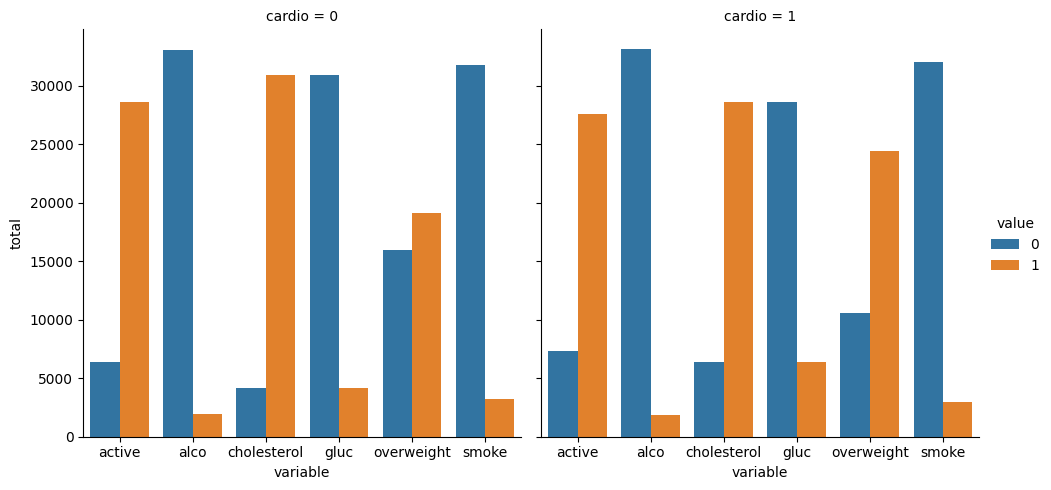

In [7]:
sns.catplot(data=df_cat, kind="bar", x="variable", y="total", hue="value", col="cardio");

### Data Cleaning

In [29]:
# conditions
cond0 = df['ap_lo'] <= df['ap_hi']

# Calculate the 2.5th and 97.5th percentiles for height and weight
cond1 = df['height'] >= df['height'].quantile(0.025)
cond2 = df['height'] <= df['height'].quantile(0.975)
cond3 = df['weight'] >= df['weight'].quantile(0.025)
cond4 = df['weight'] <= df['weight'].quantile(0.975)

df_heat = df[cond0 & cond1 & cond2 & cond3 & cond4]

In [30]:
# Calculate the correlation matrix and store it in the corr variable
corr = df_heat.corr()

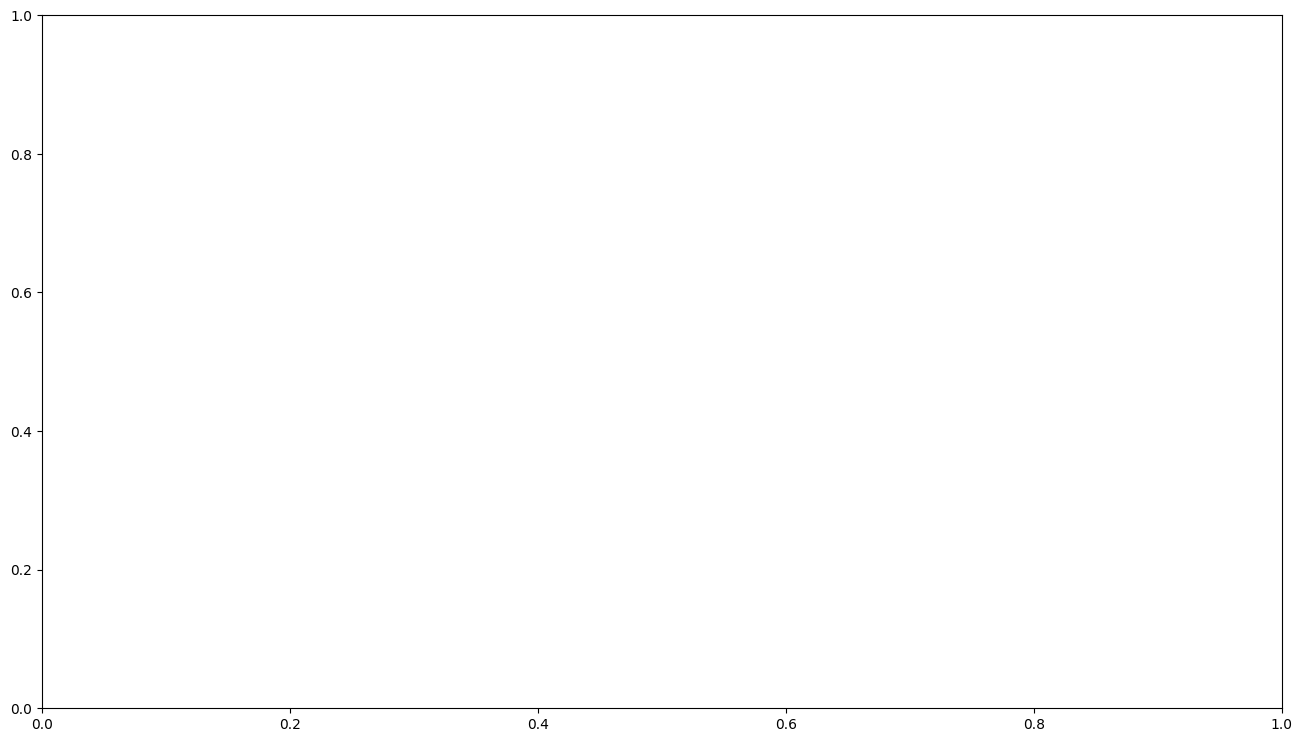

In [31]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16,9))

In [32]:
# Generate a mask for the upper triangle and store it in the mask variable
mask= np.triu(np.ones_like(corr, dtype=bool))

<Axes: >

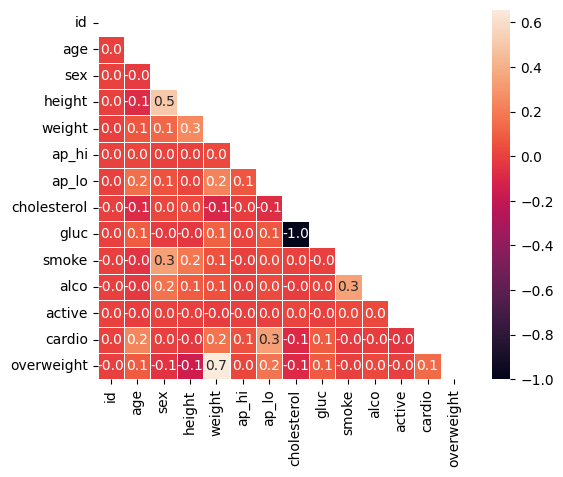

In [33]:
# Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap()
sns.heatmap(corr, mask=mask, square=True, linewidths=0.5, annot=True, fmt='0.1f')

In [26]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))
                 ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(16, 9))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, mask=mask, square=True, linewidths=0.5, annot=True, fmt="0.1f")

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

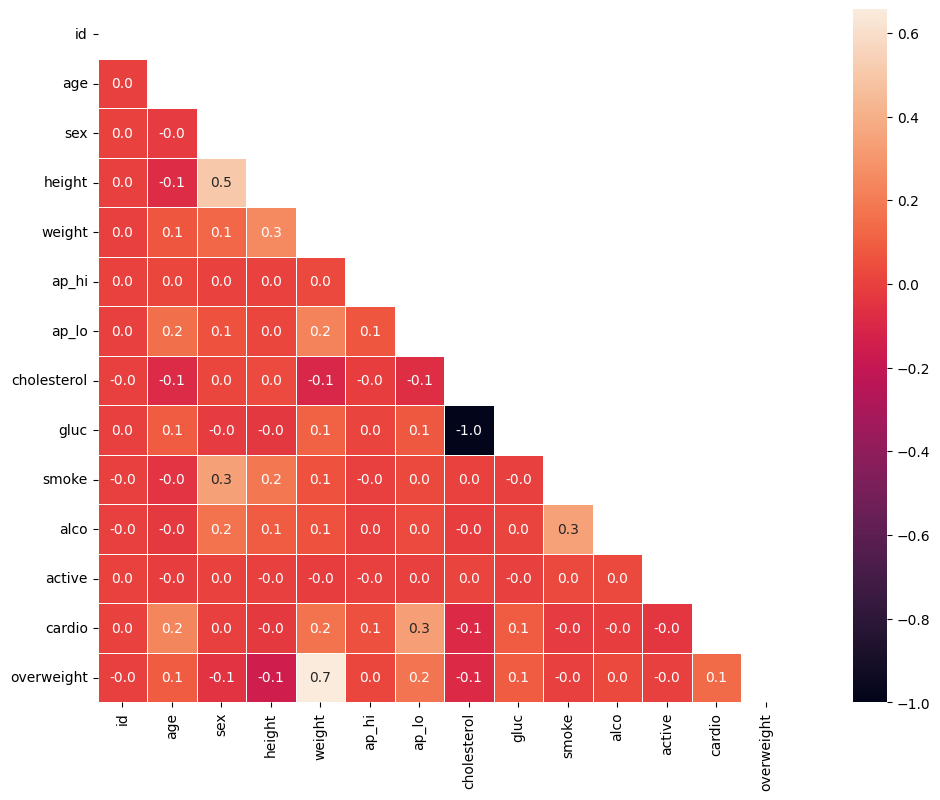

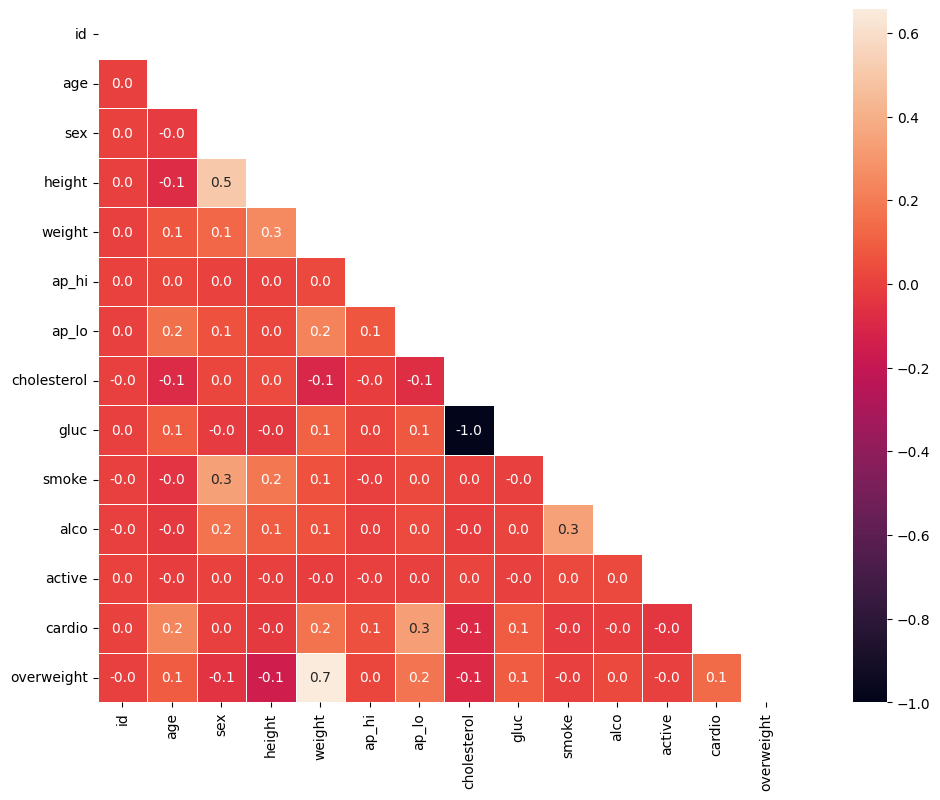

In [27]:
draw_heat_map()